In [2]:
# This cell is used for creating a button that hides/unhides code cells to quickly look only the results.
# Works only with Jupyter Notebooks.

import os
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
} else {
$('div.input').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [94]:
# Description:
#   Exercise7 notebook.
#
# Copyright (C) 2018 Santiago Cortes, Juha Ylioinas
#
# This software is distributed under the GNU General Public 
# Licence (version 2 or later); please refer to the file 
# Licence.txt, included with the software, for details.

# Preparations
import numpy as np

# Select data directory
if os.path.isdir('/coursedata'):
    # JupyterHub
    course_data_dir = '/coursedata'
elif os.path.isdir('../../../coursedata'):
    # Local installation
    course_data_dir = '../../../coursedata'
else:
    # Docker
    course_data_dir = '/home/jovyan/work/coursedata/'

print('The data directory is %s' % course_data_dir)
data_dir = os.path.join(course_data_dir, 'exercise-07-data')
print('Data stored in %s' % data_dir)
import matplotlib.pyplot as plt
import re


The data directory is /coursedata
Data stored in /coursedata/exercise-07-data


# CS-E4850 Computer Vision Exercise Round 7
## Eugeniu Vezeteu 886240

The problems should be solved before the exercise session and solutions returned via
MyCourses. <br><br> For this exercise round, upload this notebook(pdf and .ipynb versions) containing your source codes (for Exercise 1) and your answer to the question of Exercise2, and all the answers to the questions of Exercise 3 (VGG practical), see part[1-3].ipynb. Note that it's not necessary to upload part1.ipynb, part2.ipynb or part3.ipynb, because all of the necessary questions related to them are contained in this notebook and you're not expected to do any coding in Exercises 2 and 3.

## Exercise 1 - Comparing  bags-of-words  with  tf-idf  weighting
Assume  that  we  have  an  indexed  collection  of  documents  containing  the  five  terms  of the following table where the second row indicates the percentage of documents in which each term appears.<br>

| term | cat | dog |mammals | mouse | pet |
| --- | :---: | :---: | :---: | :---: | :---: |
| **% of documents** | 5 | 20 | 2 | 10 | 60 |

Now, given the query $Q=\{mouse, cat, pet, mammals\}$, compute the similarity between $Q$ and the following example documents $D1$, $D2$, $D3$, by using the cosine similarity measure and tf-idf weights (i.e. term frequency - inverse document frequency) for the bag-of-words histogram representations of the documents and the query.

-  $D1$ = Cat is a pet, dog is a pet, and mouse may be a pet too.
-  $D2$ = Cat, dog and mouse are all mammals.
-  $D3$ = Cat and dog get along well, but cat may eat a mouse.

Ignore other words except the five terms. You may proceed with the following steps:

a) Compute and report the inverse document frequency (idf) for each of the five terms. Use the logarithm with base 2. (idf is the logarithm on slide 69 of Lecture 6.)<br>
b) Compute the term frequencies for the query and each document. <br>
c) Form the tf-idf weighted word occurrence histograms for the query and documents. <br>
d) Evaluate the cosine similarity between the query and each document (i.e.\ normalized scalar product between the weighted occurrence histograms as shown on slide 45).<br> 
e) Report the relative ranking of the documents. (You should get similarities 0.95, 0.64, and 0.63, but you need to determine which corresponds to which document.)<br>

### a) Compute and report the inverse document frequency (idf) 
#for each of the five terms. Use the logarithm with base 2.

$IDF = np.log_2(\frac{N}{n_i}) = np.log_2(\frac{\textit{Total number of
documents in
database}}{\textit{Number of documents
word i occurs in, in
whole database}})$

In [102]:
data = {'cat':.05,'dog':.2,'mammals':.02, 'mouse':.1, 'pet':.6}
N=1

IDF = { word:np.log2(N/value) for word, value in data.items()} 
print('IDF')
IDF

IDF


{'cat': 4.321928094887363,
 'dog': 2.321928094887362,
 'mammals': 5.643856189774724,
 'mouse': 3.321928094887362,
 'pet': 0.7369655941662062}

### b) Compute the term frequencies for the query and each document.

$\textit{term freq} = \frac{n_{id}}{n_d} = \frac{\textit{Number of
occurrences of word
i in document d }}{Number of words in
document d }$

In [103]:
D1 = 'Cat is a pet, dog is a pet, and mouse may be a pet too.'
D2 = 'Cat, dog and mouse are all mammals.'
D3 = 'Cat and dog get along well, but cat may eat a mouse.'
Q = 'mouse cat pet mammals'

def extract_words(doc): #Ignore other words except the five terms.
    s = re.sub(r'[^\w\s]','',doc) # remove punctuation
    return [i.lower() for i in s.split()]

d1=extract_words(D1)
d2=extract_words(D2)
d3=extract_words(D3)
q=extract_words(Q)

def _tf(d):
    n_d = len(d) #Number of words in document d 
    tf = {}
    for i in set(d):
        n_id = 0 #Number of occurrences of word i in document d
        for w in d:
            if w.lower() == i.lower():
                n_id += 1
        tf[i] = round(n_id/n_d,4)
        
    return tf

#print('d1 ',d1)
print('term frequencies - D1')
tf_D1 = _tf(d1)
print(tf_D1)
print()

#print('d2 ',d2)
print('term frequencies - D2')
tf_D2 = _tf(d2)
print(tf_D2)
print()

#print('d3 ',d3)
print('term frequencies - D3')
tf_D3 = _tf(d3)
print(tf_D3)
print()

#print('q ',q)
print('term frequencies - Q')
tf_Q = _tf(q)
print(tf_Q)
print()



term frequencies - D1
{'too': 0.0667, 'is': 0.1333, 'mouse': 0.0667, 'cat': 0.0667, 'a': 0.2, 'be': 0.0667, 'and': 0.0667, 'dog': 0.0667, 'pet': 0.2, 'may': 0.0667}

term frequencies - D2
{'mouse': 0.1429, 'cat': 0.1429, 'are': 0.1429, 'and': 0.1429, 'all': 0.1429, 'dog': 0.1429, 'mammals': 0.1429}

term frequencies - D3
{'mouse': 0.0833, 'cat': 0.1667, 'along': 0.0833, 'a': 0.0833, 'and': 0.0833, 'eat': 0.0833, 'well': 0.0833, 'dog': 0.0833, 'get': 0.0833, 'but': 0.0833, 'may': 0.0833}

term frequencies - Q
{'mouse': 0.25, 'cat': 0.25, 'pet': 0.25, 'mammals': 0.25}



### c) Form the tf-idf weighted word occurrence histograms for the query and documents.

tf-idf
$$t_i = \frac{n_{id}}{n_d} \log \frac{N}{n_i}$$


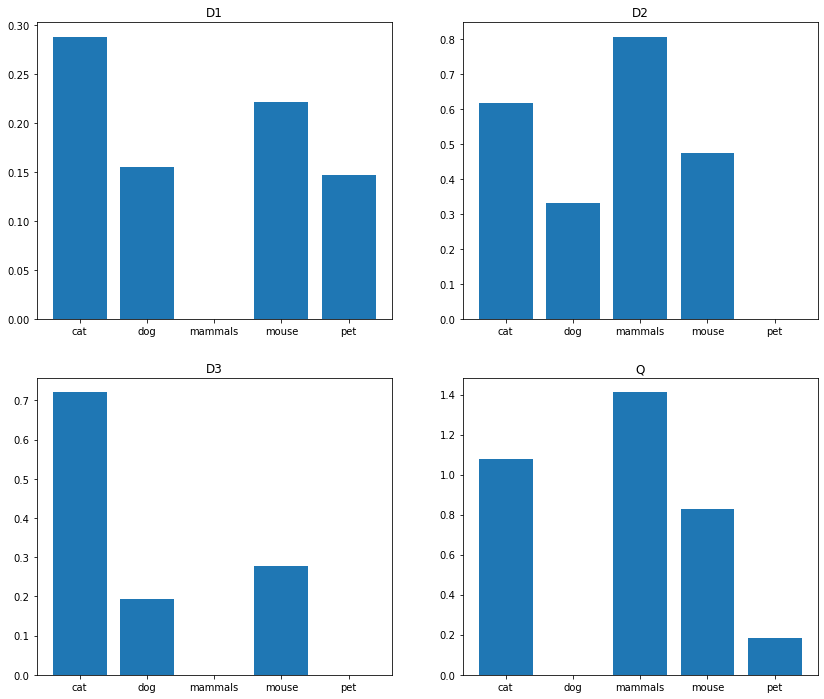

In [100]:
fig, ax = plt.subplots(figsize=(14,12),ncols=2, nrows=2)
tf = [tf_D1, tf_D2, tf_D3, tf_Q]
labels = ['D1','D2','D3','Q']
tf_idf_data = {}

for i in range(len(labels)):
    label=labels[i]
    tf_i = tf[i]    
    tf_idf = {key:0.0 for key in IDF.keys()}
    
    for word in tf_i.keys():
        if word in IDF.keys():
            tf_idf[word] = tf_i[word] * IDF[word]
    
    
    tf_idf_data[label] = tf_idf
    words = list(tf_idf.keys())
    vals = list(tf_idf.values())
    
    ax[int(i/2),i%2].bar(range(len(tf_idf)),vals,tick_label=words)
    ax[int(i/2),i%2].set_title(label)

#tf_idf_data

### d) Evaluate the cosine similarity between the query and each document
$$ sim(d_j,q) = \frac{<d_j,q>}{||d_j||*||q||} $$

In [101]:
def sim(dj,q):
    up = np.sum([dj[word] * q[word] for word in q])
    dj_norm = np.sqrt(np.sum([dj[word]**2 for word in dj])) 
    q_norm = np.sqrt(np.sum([q[word]**2 for word in q]))
    
    return up / (dj_norm*q_norm)

labels = ['D1','D2','D3']
for j in range(len(labels)):
    label=labels[j]
    print('Cosine sim between doc {} and Q'.format(j+1))
    s = sim(dj = tf_idf_data['D{}'.format(j+1)],  q=tf_idf_data['Q'])
    print(s)
    print()



Cosine sim between doc 1 and Q
0.6289067101021564

Cosine sim between doc 2 and Q
0.9546948111493487

Cosine sim between doc 3 and Q
0.6431752760562872



### e) Report the relative ranking of the documents.

## Exercise 2 - Precision  and  recall
There is a database of 10000 images and a user, who is only interested in images which contain a car. It is known that there are 500 such images in the database. An  automatic image retrieval system retrieves 300 car images and 50 other images from the database. Determine and report the precision and recall of the retrieval  system in this particularcase.

$
Precision = \frac{TP}{TP+FP} = \frac{300}{300+50} = 0.857 
$

$
Recall = \frac{TP}{TP+FN} = \frac{300}{500} = 0.6
$




















## Exercise 3 - VGG practical on object instance recognition
See the questions in part[1-3].ipynb and write your answers here.

Part1:
Stage I.A (two questions)
Stage I.B (two questions)
Stage I.C (one question)

Part2 (one question)

Part3:
Stage III.A (three questions)
Stage III.B (one question)
Stage III.C (two questions)

Type your answers here: 

PART1: 
StageI.A

1)In the second image, we have a shadow on the left side of the building, and the right side is illuminated brighter by the sun's rays. To identify Key features we used SIFT detector, which are the minimums and maximums between the result of applying the gauss filter on the images, It will not be a high problem for matching, because main features are quite clear (corner, edges of the building). To avoid this we can modify the KD tree algorithm, to identify the nearest neighbour with a limited number of features.

2)This problem occurs when the image structure is non-planar.Determining the orientation can be ambiguous, In this case, SIFT will return a list of up to four possible orientations, building up to four frames for each detected image blob.

Stage I.B

1)Descriptors are calculated over a larger region because the orientation histogram is calculated from the orientation and magnitude of 16x16 regions around the key point, so that each histogram has samples from the 4x4 region.

2)The mismatch appear due to high dimensions of the features. Changing the light is not a problem, because SIFT is generally robust to noise. To remove the mismatch, we can apply the modified version of the KD tree, to find the best bin first search or by introducing the second nearest neighbour test (Improving SIFT matching using Lowe’s)

Stage I.C

1)There are still remaining mismatches
 because, Lowe rejected all matches where the distance ratio is greater than 0.8,  eliminating 90% of false matches while throwing less than 5% of correct matches. We can use a modified version of RANSAC algorithm to clean the matching from the previous result.


Part2

1)------------------------------------


Part3: Stage III.A 

1)A smaller number of clusters is decreasing the difficulty of computing the transformation, while at the same time the number of inliers has a small reduction.

2)The conversion of the descriptions into visual words can be precomputed, so it's not an accounted as a query time.

3)-------------------------------------


Part3: Stage III.B

1)Because the same images were used for modelling the database and for query, (The query image is top image) 


Part3: Stage III.C

1)The top score much larger than 1, because it is computed as the number of inlier words

2)The retrieval results improved after geometric verification because the irrelevant images have lower score
